In [4]:
!pip install git+https://github.com/flaviostutz/sentinelloader

  Cloning https://github.com/flaviostutz/sentinelloader to /tmp/pip-req-build-equq9e1f
  Stored in directory: /tmp/pip-ephem-wheel-cache-lj52tc3j/wheels/50/ec/84/a8c56ef0693bfee8662a78cc6ec6695b8dbffca99284c56e5f
  Stored in directory: /root/.cache/pip/wheels/2a/80/9b/015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
  Stored in directory: /root/.cache/pip/wheels/7b/55/a9/8b281242aa68aaf73271de1457e4f5edabbeb016f392fb987f
Successfully built sentinelloader uuid geomet


DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:sentinelloader:2019-01-06 00:00:00
INFO:sentinelloader:Getting contents. band=TCI, resolution=60m, date=2019-01-06
INFO:sentinelloader:Querying API for candidate tiles
DEBUG:sentinelloader:Using cached API query contents
DEBUG:sentinelloader:Found 4 products
DEBUG:sentinelloader:Tiles selected for covering the entire desired area: [1]
DEBUG:sentinelloader:Reusing cached metadata info for tile '56ec209b-9700-47f8-9e2e-ee2182f34116'
DEBUG:sentinelloader:Reusing tile data from cache
DEBUG:sentinelloader:Cropping polygon [(-47.873796, -16.044801), (-47.933796, -16.044801), (-47.933796, -15.924801), (-47.873796, -15.924801)] from 1 files
DEBUG:sentinelloader:Combining tiles into a single image. tmpfile=/notebooks/data/output/sentinelcache/tmp/80d7fb2b344c482db9af5cdbe9e532ce.tiff
DEBUG:sentinelloader:2019-01-11 00:00:00
INFO:sentinelloader:Getting contents. band=TCI, resolution=60m, date=20

DEBUG:sentinelloader:Found 4 products
DEBUG:sentinelloader:Tiles selected for covering the entire desired area: [0]
DEBUG:sentinelloader:Reusing cached metadata info for tile '1c391365-9b75-48e5-8f75-041051acb60b'
DEBUG:sentinelloader:Reusing tile data from cache
DEBUG:sentinelloader:Cropping polygon [(-47.873796, -16.044801), (-47.933796, -16.044801), (-47.933796, -15.924801), (-47.873796, -15.924801)] from 1 files
DEBUG:sentinelloader:Combining tiles into a single image. tmpfile=/notebooks/data/output/sentinelcache/tmp/41622b457a58455391e15f4a0a734131.tiff
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:up

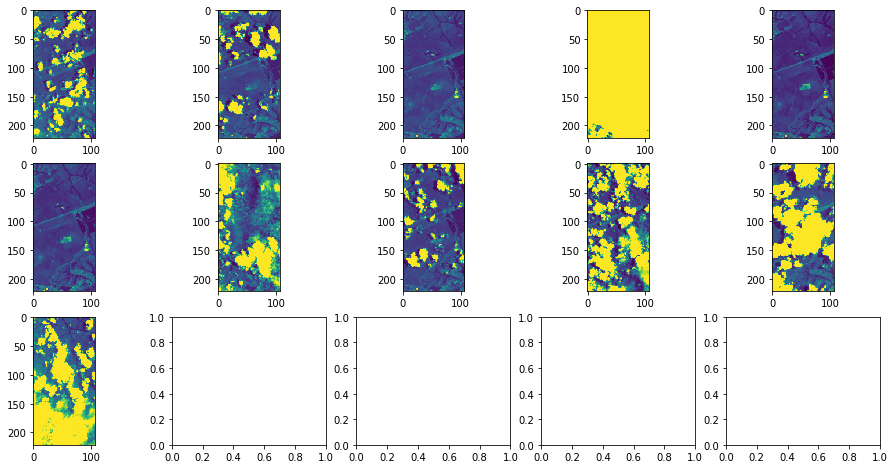

In [36]:
%matplotlib inline
import logging
import os
from osgeo import gdal
import matplotlib.pyplot as plt
from sentinelloader import SentinelLoader
from matplotlib import rcParams
import math
logging.basicConfig(level=logging.INFO)

sl = SentinelLoader('/notebooks/data/output/sentinelcache', 
                    'user', 'pass',
                    apiUrl='https://scihub.copernicus.eu/apihub/', showProgressbars=True)

# area = [(-51.15, -14),(-51.8,-14),(-51.8,-14.25),(-51.15,-14.25),(-51.15,-14)]# area = [(-51.15, -14),(-51.8,-14),(-51.8,-14.25),(-51.15,-14.25),(-51.15,-14)]
area = [(-47.873796, -16.044801), (-47.933796, -16.044801),
        (-47.933796, -15.924801), (-47.873796, -15.924801)]
# area = [(-51.15, -14),(-52.1,-14),(-52.1,-14.25),(-51.15,-14.25),(-51.15,-14)]# area = [(-51.15, -14),(-51.8,-14),(-51.8,-14.25),(-51.15,-14.25),(-51.15,-14)]
# area = [(-44.8, -15),(-46.2,-15),(-46.2,-15.2),(-44.8,-15.2)]# area = [(-51.15, -14),(-51.8,-14),(-51.8,-14.25),(-51.15,-14.25),(-51.15,-14)]
# area = [(-50.45, -15.25),(-50.65, -15.25),(-50.65, -15.45),(-50.65, -15.45),(-49.5, -16.5)]
# area = [(-44.8, -15),(-45.3,-15),(-45.3,-15.2),(-44.8,-15.2)]# area = [(-51.15, -14),(-51.8,-14),(-51.8,-14.25),(-51.15,-14.25),(-51.15,-14)]
# geoTiffs = sl.getProductBandTiles(area, 'TCI', '60m', dateReference='2019-01-01', dateToleranceDays=20, cloudCoverage=(0,40))
# geoTiff = sl.cropRegion(area, geoTiffs)
# ds = gdal.Open(geoTiff).ReadAsArray()
# plt.figure(figsize=(44,44))
# plt.imshow(ds[0])
# plt.show()
# os.remove(geoTiff)

geoTiffs = sl.getRegionHistory(area, 'TCI', '60m', '2019-01-06', '2019-02-28', daysStep=5, dateToleranceDays=5)

rcParams['figure.figsize'] = 16,8
lines = math.ceil(len(geoTiffs)/5)
fig,ax = plt.subplots(nrows=lines, ncols=5)

i = 0
for geoTiff in geoTiffs:
    ds = gdal.Open(geoTiff).ReadAsArray()
    a = math.floor(i/5)
    b = i%5
    ax[a][b].imshow(ds[0])
    os.remove(geoTiff)
    i = i + 1

# img = plt.imread(geoTiff)
# plt.imshow(img[:, :, 0], cmap=plt.cm.coolwarm)
# sl.getContents(area, 'TCI', '10m', dateReference='2019-01-01', dateToleranceDays=20, cloudCoverage=(0,40), cloudless=False, cloudlessDays=20)
# area = [(-44.8, -15),(-45.1,-15),(-45.1,-15.2),(-44.8,-15.2)]# area = [(-51.15, -14),(-51.8,-14),(-51.8,-14.25),(-51.15,-14.25),(-51.15,-14)]
# sl.getContents(area, 'TCI', '60m', dateReference='now', dateToleranceDays=20, cloudCoverage=(0,40), cloudless=False, cloudlessDays=20)
